In [1]:
%matplotlib inline

# Shapiro Wilk Test

This test is used to check if normality assumption holds for the data that we have. Usually, we need to do the normality test before we do any parametric test such as T-test, F-test, ANOVA etc. This is because these statistical technique are construct based on data that is normally distributed. If we have data that violate the normality assumption, usually the researcher need to use other technique to run the analysis such as the non-parametric statistic. Example of the non-parametric such as the Wilcoxon Rank test, Sign Test, and Mann-Whitney Test. 

So now, we're going to see how Shapiro Wilk test is conduct and we'll try to simulate the test using the sampling distribution. I will use the MysIDC "Illiteracy rate of population aged 15-24 years by sex 2001-2021" dataset for the simulation. 

The test statistic for the Shapiro Wilk is calculated using the below formula:
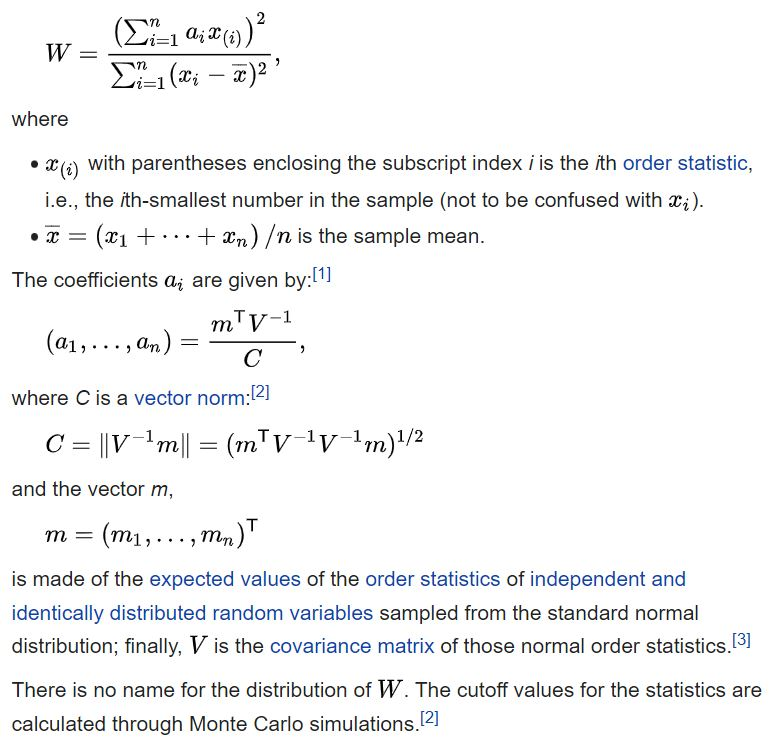

If we take a closer look to the test statistic, we could notice that what we're trying to do is to check the skewness of our data. The denominator is simply the variance of our data. While for the numerator part, just imagine if we have data that is very skewed to the right. For right-skewed data, the frequency for small number $>$ large number. Our test statistic can be so small. Same goes with a very left-skewed data. We might get a very large W.

In python, we can use the scipy package to run this test.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

path = 'C:/Users/farea/Desktop/Illiteracy rate of population aged 15-24 years by sex 2001 - 2021 Malaysia_dataset.xlsx'

data = pd.read_excel(path)
data = data.pivot(index='Year', columns = 'Sex', values = 'Illiteracy rate (%)')
data.describe()

Sex,Female,Male,Total
count,21.000000,21.000000,21.000000
mean,2.113449,2.238370,2.197665
std,0.503731,0.675345,0.601839
min,1.500000,1.500000,1.500000
25%,1.700000,1.600000,1.600000
50%,2.000000,2.200000,2.100000
75%,2.500000,2.600000,2.700000
max,3.300000,3.600000,3.400000


In [3]:
from scipy.stats import shapiro

test_stat, pval = shapiro(data['Male'])
test_stat, pval

(0.8870381116867065, 0.01977558247745037)

If we are using 95% level of confidence, we will arrive to the result to reject the null hypothesis because p $<$ 0.05. We have sufficient evident to say that the male illiteracy rate is not normally distributed.

I will now use Monte Carlo simulation to build up our W distribution under H0 and see if we will arrive to the same conclusion as above or not. For Monte Carlo simulation, we just simply repeat a lot of random sampling and use the sample to calculate our W statistic

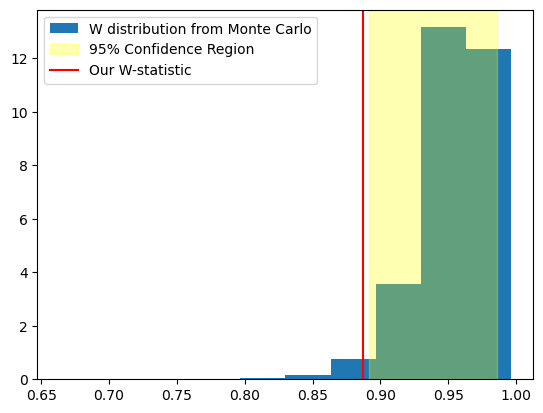

In [4]:
from numpy.random import normal

nsample = 10000
monte_data = normal(loc=2.197665, size=(nsample,20))
W=[]
for i in range(nsample):
    w, pval = shapiro(monte_data[i,:])
    W.append(w)

lower = np.percentile(W, 2.75)
upper = np.percentile(W, 97.5)

fig, ax = plt.subplots()
ax.hist(W, density=True, label='W distribution from Monte Carlo')
ax.axvspan(lower,upper, color='yellow', alpha=0.3, label='95% Confidence Region')
ax.axvline(test_stat, color='red', label='Our W-statistic')
plt.legend()

And there you go. Under the null hypothesis, our W should be distributed as the histogram above. However, since our data falls slightly outside of the 95% confidence region, we can say that we are observing an event that is unlikely to happen (p-val $\approx$ 2% of the time). Thus, we are arriving to the conclusion to reject the null hypothesis and conclude that our data is not normally distributed.

In [5]:
prob = []
for w in W:
    if w < 0.888:
        prob.append(1)
    else:
        prob.append(0)
print('Probability to observe W < 0.888: ', np.sum(prob)/len(prob))

Probability to observe W < 0.888:  0.0238
